필요한 패키지를 가져옵니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.datasets import mnist

이미지 데이터셋을 불러옵니다. 

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('x_train shape : ' + str(x_train.shape))
print('y_train shape : ' + str(y_train.shape))
print('x_test shape : ' + str(x_test.shape))
print('y_test shape : ' + str(y_test.shape))

11490434/11490434 [==============================] - 0s 0us/step
x_train shape : (60000, 28, 28)
y_train shape : (60000,)
x_test shape : (10000, 28, 28)
y_test shape : (10000,)


테스트할 샘플 하나를 살펴봅니다.

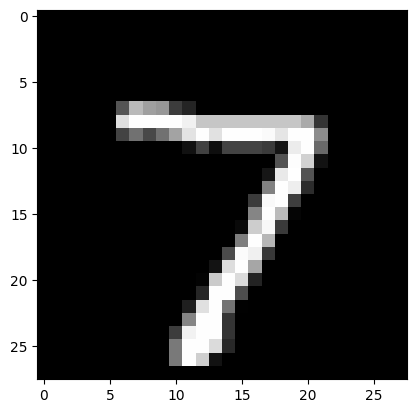

In [3]:
import matplotlib.pyplot as plt

plt.imshow(x_test[0], cmap='gray')

인공지능 모델이 이 이미지를 입력받았을 때, 해당하는 숫자를 출력할 수 있도록 만드는 것이 목표입니다. 우리는 y_test 라벨값도 가지고 있어서 바로 확인은 할 수 있으나, 모델 학습 시에는 사용이 되지 않으며, 시험 평가할 때만 사용됩니다.

In [4]:
print(y_test[0])

7


이미지와 라벨과 함께 같이 가시화 시킵니다.

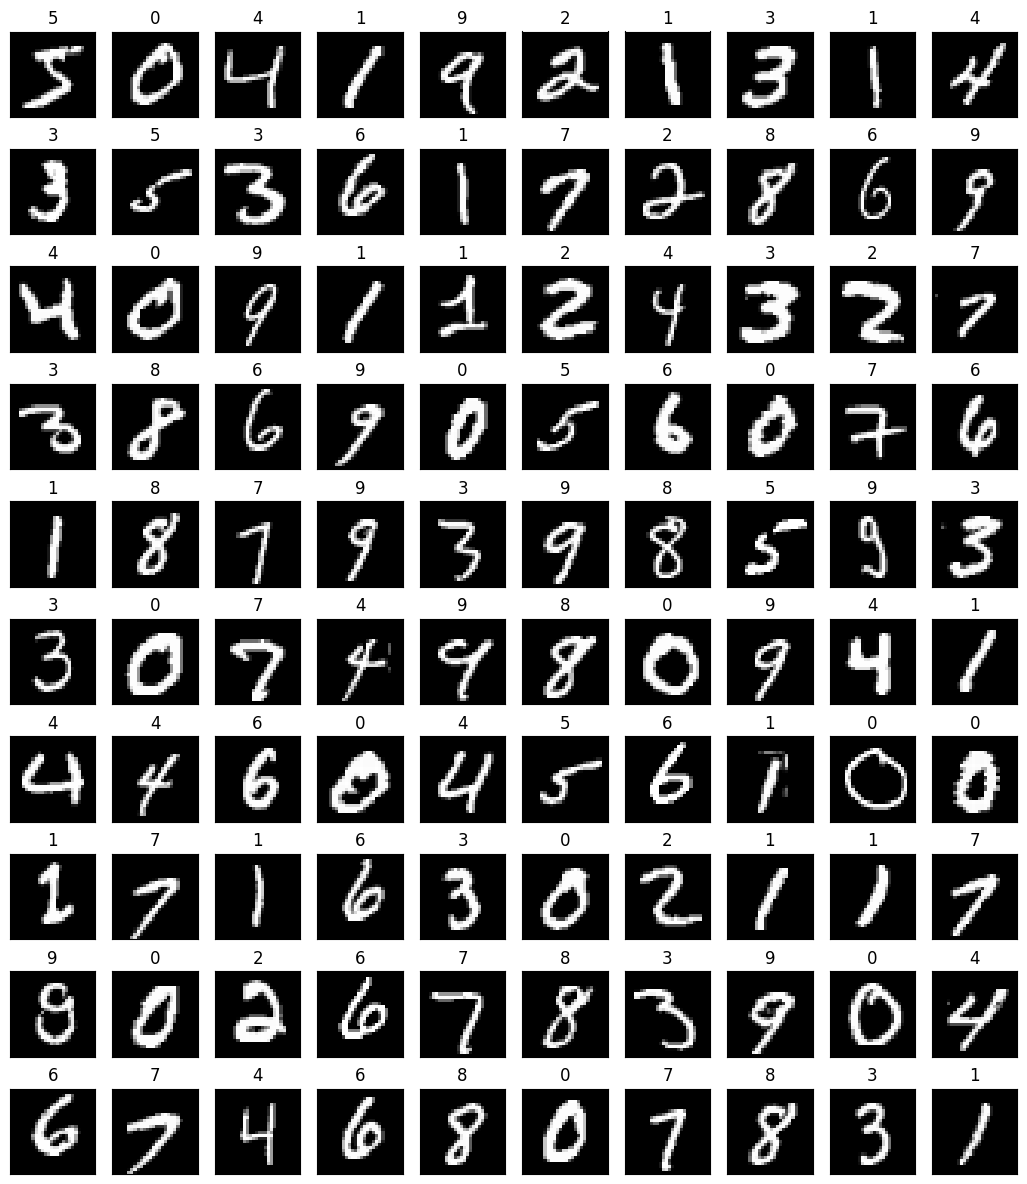

In [6]:
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(13, 15), 
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap = 'gray')
    title = str(y_train[i])
    ax.set_title(title)

plt.show()

모델 학습에 용이하도록 다음과 같이 데이터 전처리를 수행합니다.

*   데이터 전처리
    * 3차원(샘플수, 세로, 가로)를 4차원(샘플수, 세로, 가로, 채널)으로 변경
    * 정수를 실수로 변경
    * 0 ~ 255 사이의 수치를 0.0 ~ 1.0 사이로 정규화 수행
*   라벨 전처리
    * 0 ~ 9 라벨에 대한 원핫인코딩 수행 



In [7]:
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

모델은 다음과 같이 구성하였습니다.

* 입력: 3차원 벡터 (세로 28, 가로 28, 채널 1)
* 출력: 10개 벡터
* 출력층의 활성화 함수: 소프트맥스
* 손실함수: categorical_crossentropy
* 최적화기: adam
* 평가 메트릭: accuracy

컨볼루션 신경망을 구성하기 위해, 컨볼루션 레이어, 맥스풀링 레이어, 플래튼 레이어를 사용하였습니다.


In [8]:
model = Sequential([
    Conv2D(32, (3, 3), padding='same', input_shape=(28, 28, 1), activation='relu'),
    Conv2D(32, (3, 3), padding='same', activation='relu'), 
    MaxPooling2D(pool_size=(2, 2)), 
    Conv2D(64, (3, 3), padding='same', activation='relu'), 
    Conv2D(64, (3, 3), padding='same', activation='relu'), 
    MaxPooling2D(pool_size=(2, 2)), 
    Flatten(), 
    Dense(512, activation='relu'), 
    Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

모델 네트워크 아키텍처 구성을 그려보겠습니다.

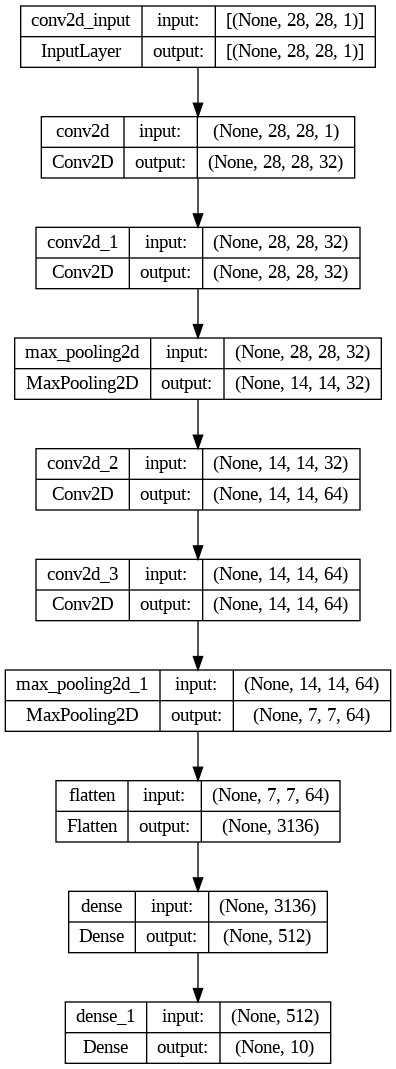

In [9]:
plot_model(model, show_shapes=True)

모델을 학습시킬 때, validation_split 옵션을 두면 훈련셋 일부를 검증셋으로 설정할 수 있습니다. 0.2로 설정할 경우, 전체 훈련셋에서 20%를 검증셋, 나머지를 훈련셋으로 구성하여 학습합니다.

콜백함수를 사용하여, 매 에포크마다 검증셋의 손실값을 체크한 후, 이전 손실값보다 낮은 경우 모델을 파일로 저장합니다. 즉 학습 종료가 되면, "best_model.h5" 파일에 저장된 모델은 손실값이 가장 낮을 때의 가중치를 가지고 있습니다.

In [10]:
checkpoint_callback = ModelCheckpoint("best_model.h5", 
                                      save_best_only=True, 
                                      monitor="val_loss")

hist = model.fit(x_train, y_train, 
                 validation_split=0.2, 
                 batch_size=32,
                 epochs=100,  
                 callbacks=[checkpoint_callback])

Epoch 1/100
1500/1500 [==============================] - 20s 5ms/step - loss: 0.1191 - accuracy: 0.9630 - val_loss: 0.0505 - val_accuracy: 0.9843
Epoch 2/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0385 - accuracy: 0.9877 - val_loss: 0.0403 - val_accuracy: 0.9889
Epoch 3/100
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0271 - accuracy: 0.9915 - val_loss: 0.0356 - val_accuracy: 0.9882
Epoch 4/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0186 - accuracy: 0.9944 - val_loss: 0.0429 - val_accuracy: 0.9899
Epoch 5/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0155 - accuracy: 0.9952 - val_loss: 0.0401 - val_accuracy: 0.9902
Epoch 6/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0124 - accuracy: 0.9962 - val_loss: 0.0327 - val_accuracy: 0.9921
Epoch 7/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0113 - accuracy: 0.9968 - val_loss: 0.0473 - val_a

학습 시 매 에포크에 해당하는 훈련셋과 검증셋에 대한 손실값과 평가 메트릭 수치를 확인할 수 있습니다. 이를 시각화시키면 어느 에포크에서 오버피팅이 일어났는 지 한 눈에 확인할 수 있습니다.

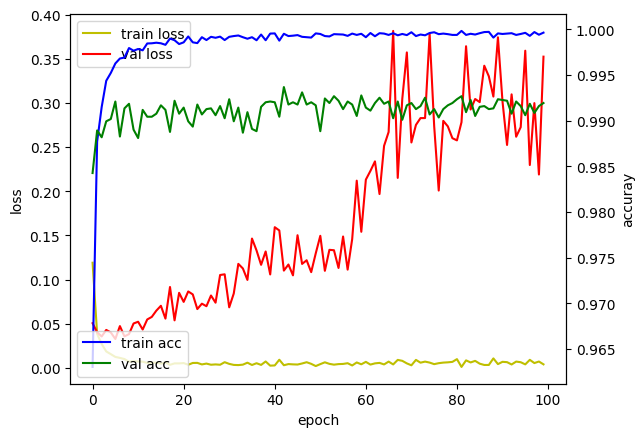

In [11]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

파일로 저장된 모델을 로딩하여 시험셋으로 최종 평가를 수행합니다.

In [12]:
model = load_model("best_model.h5")

test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0294 - accuracy: 0.9912
Test accuracy 0.9911999702453613
Test loss 0.029409313574433327
